In [23]:
import numpy as np
import cv2
from PIL import Image
import os
import matplotlib.pyplot as plt

In [24]:

file = "IMG_8253.JPG"

image = os.path.join("dataset_for_coins",file)
img = cv2.imread(image)
img_resized = cv2.resize(img, (1024, 1280))
img_resized = cv2.medianBlur(img_resized, 7)
gray = cv2.cvtColor(img_resized, cv2.COLOR_BGR2GRAY)

# plt.imshow(gray)
# plt.show()


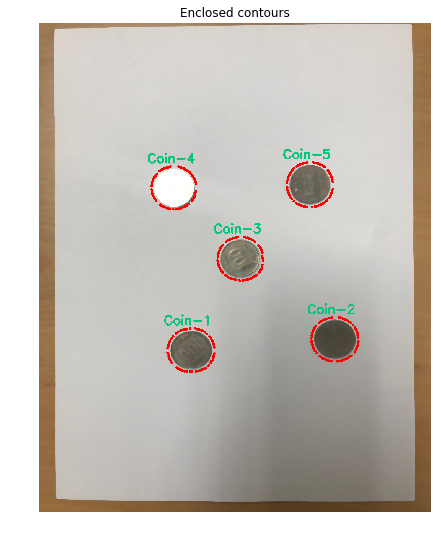

In [25]:

gray_blur = cv2.GaussianBlur(gray, (15, 15), 0)
contours = cv2.Canny(gray_blur, 30, 135)
thresh = cv2.adaptiveThreshold(contours, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 15, 1)

kernel = np.ones((1, 1), np.uint8)
closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations=10)

closing_ = closing.copy()
contours, _ = cv2.findContours(closing_, cv2.RETR_EXTERNAL, \
                                           cv2.CHAIN_APPROX_SIMPLE)

for contour in range(len(contours)):
    cv2.drawContours(img_resized, contours[contour], -1, (0, 0, 255),5)
    x,y,w,h = cv2.boundingRect(contours[contour])
    cv2.putText(img_resized, 'Coin-' + str(contour+1), (x-10,y-10), cv2.FONT_ITALIC,1.1,(120,200,0),3)

plt.figure(figsize=(16,9))
plt.title("Enclosed contours")
plt.axis('off')
plt.imshow(cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB))
plt.show()